In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.graphics.tsaplots as sgt 
import statsmodels.tsa.stattools as sts 
from statsmodels.tsa.seasonal import seasonal_decompose

import statsmodels.graphics.tsaplots as sgt
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from scipy.stats.distributions import chi2
import statsmodels.tsa.stattools as sts 
from sklearn.metrics import mean_squared_error, mean_absolute_error



In [2]:
df=pd.read_csv('data/Nuclear_Capacity.csv')


In [3]:
# Extraigo solo la parte de la fecha (ignorando el número de fila)
df['fecha_str'] = df.iloc[:, 0].str.split(' ').str[:2].str.join(' ')

In [4]:
# Convierto a datetime
df['fecha'] = pd.to_datetime(df['fecha_str'], format='%Y %m%d')

In [5]:
# Ordenar por fecha
df = df.sort_values('fecha')

In [6]:
df.head()

,Unnamed: 0,"U.S. nuclear capacity, daily (Megawatts)",fecha_str,fecha
0,2007 0101 01,101764.9,2007 0101,2007-01-01
1,2007 0102 02,101764.9,2007 0102,2007-01-02
2,2007 0103 03,101764.9,2007 0103,2007-01-03
3,2007 0104 04,101764.9,2007 0104,2007-01-04
4,2007 0105 05,101764.9,2007 0105,2007-01-05


In [7]:
# Crear rango completo de fechas
fecha_min = df['fecha'].min()
fecha_max = df['fecha'].max()
rango_completo = pd.date_range(start=fecha_min, end=fecha_max, freq='D')

In [8]:
print(f'Fecha de inicio: {fecha_min}')
print(f'Fecha de fin: {fecha_max}')
print(f'Cantidad de fechas: {len(rango_completo)}')

Fecha de inicio: 2007-01-01 00:00:00
Fecha de fin: 2021-04-21 00:00:00
Cantidad de fechas: 5225


In [9]:
# Identificar fechas faltantes
fechas_disponibles = set(df['fecha'].dt.date)
fechas_faltantes = [fecha.date() for fecha in rango_completo if fecha.date() not in fechas_disponibles]

In [10]:
print(f"Se encontraron {len(fechas_faltantes)} fechas faltantes")
if fechas_faltantes:
    print("Primeras 10 fechas faltantes:", fechas_faltantes[:10])

Se encontraron 0 fechas faltantes


In [11]:
df.head()

,Unnamed: 0,"U.S. nuclear capacity, daily (Megawatts)",fecha_str,fecha
0,2007 0101 01,101764.9,2007 0101,2007-01-01
1,2007 0102 02,101764.9,2007 0102,2007-01-02
2,2007 0103 03,101764.9,2007 0103,2007-01-03
3,2007 0104 04,101764.9,2007 0104,2007-01-04
4,2007 0105 05,101764.9,2007 0105,2007-01-05


In [12]:
df.columns

Index(['Unnamed: 0', 'U.S. nuclear capacity, daily (Megawatts)', 'fecha_str',
       'fecha'],
      dtype='object')

In [13]:
# Reordeno las columnas, primero fecha y luego U.S. nuclear capacity, daily (Megawatts)
df = df[['fecha', 'U.S. nuclear capacity, daily (Megawatts)']]

In [14]:
df.head()

,fecha,"U.S. nuclear capacity, daily (Megawatts)"
0,2007-01-01,101764.9
1,2007-01-02,101764.9
2,2007-01-03,101764.9
3,2007-01-04,101764.9
4,2007-01-05,101764.9


In [15]:
# Renombro la columna U.S. nuclear capacity, daily (Megawatts) a Capacidad
df = df.rename(columns={'U.S. nuclear capacity, daily (Megawatts)': 'Capacidad'})

In [16]:
df.head()

,fecha,Capacidad
0,2007-01-01,101764.9
1,2007-01-02,101764.9
2,2007-01-03,101764.9
3,2007-01-04,101764.9
4,2007-01-05,101764.9


In [17]:
df.shape

(5225, 2)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5225 entries, 0 to 5224
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   fecha      5225 non-null   datetime64[ns]
 1   Capacidad  5225 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 81.8 KB


In [19]:
df.describe()

,fecha,Capacidad
count,5225,5225.000000
mean,2014-02-25 00:00:00.000000256,100610.960287
min,2007-01-01 00:00:00,27239.600000
25%,2010-07-30 00:00:00,99277.900000
50%,2014-02-25 00:00:00,101001.400000
75%,2017-09-23 00:00:00,101764.900000
max,2021-04-21 00:00:00,104182.000000
std,NaN,2825.445609


In [20]:
# Defino el indice como fecha
df.set_index('fecha', inplace=True)

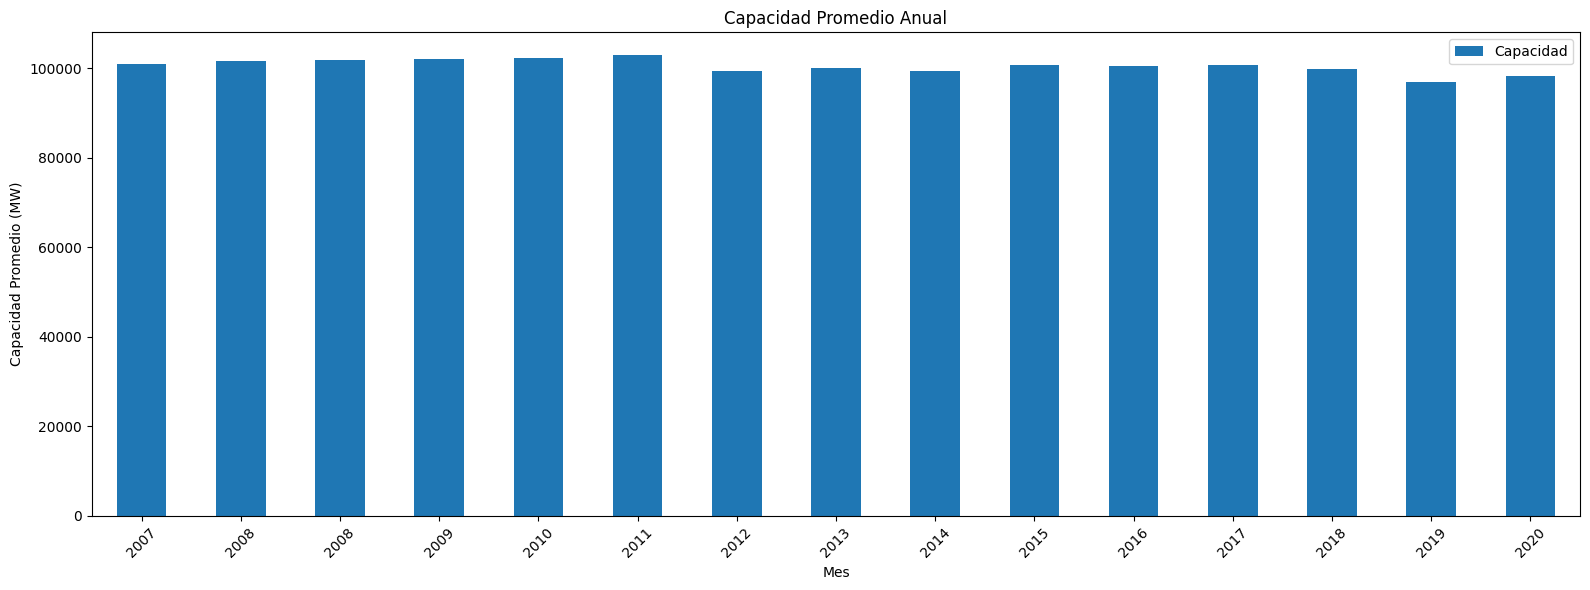

In [21]:
# Calculo el promedio anual de la capacidad en Megawatts
titulo = "Capacidad Promedio Anual"
promedio_anual = df.resample('YE').mean()

# Grafico
promedio_anual.plot.bar(figsize=(16,6), title=titulo, color='#1f77b4')

anios = ['2007', '2008', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021']

plt.xticks(range(len(promedio_anual)), anios[:len(promedio_anual)], rotation=45)

plt.xlabel('Mes')
plt.ylabel('Capacidad Promedio (MW)')
plt.tight_layout()
plt.show()

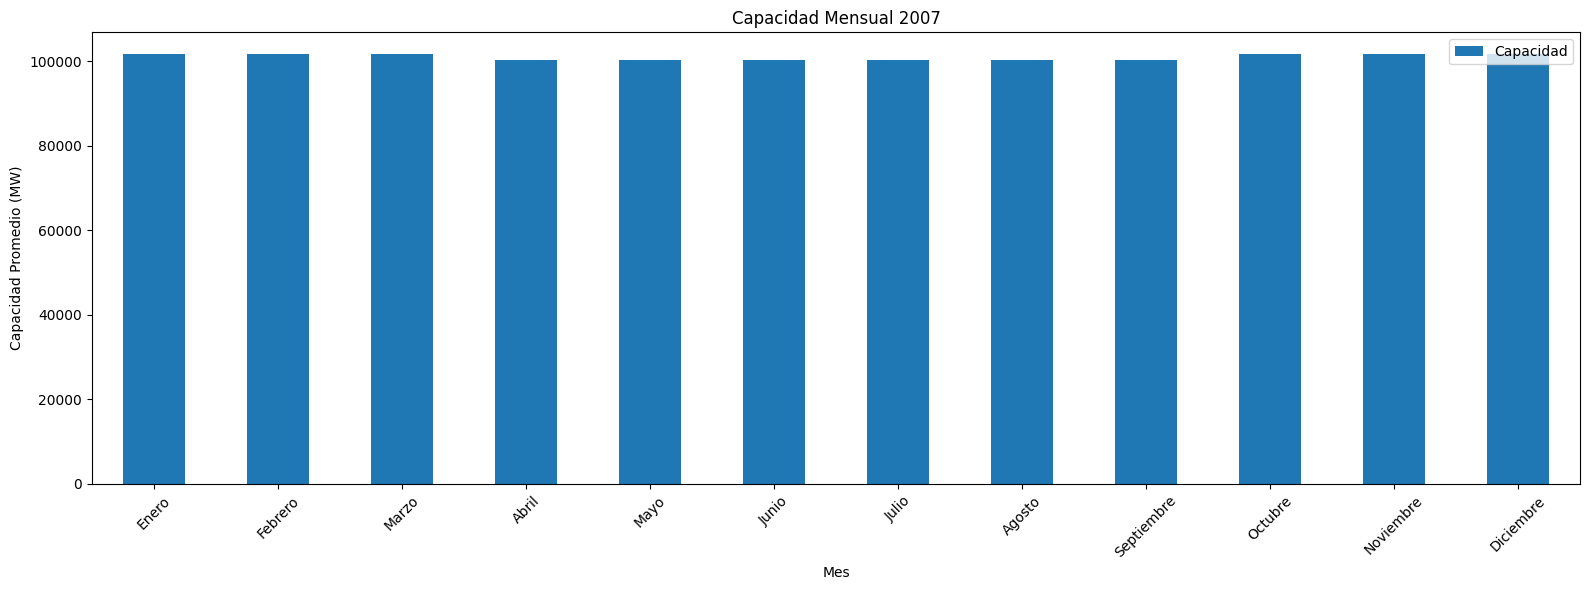

In [22]:
# Calculo el promedio mensual de la capacidad en Megawatts para el año 2007

# Filtro solo los datos del año 2007
df_2007 = df[df.index.year == 2007]

# Calcular promedio mensual de capacidad en 2007
titulo = "Capacidad Mensual 2007"
promedio_mensual_2007 = df_2007.resample('ME').mean()

# Grafico
promedio_mensual_2007.plot.bar(figsize=(16,6), title=titulo, color='#1f77b4')

meses = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 
         'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']
plt.xticks(range(len(promedio_mensual_2007)), meses[:len(promedio_mensual_2007)], rotation=45)

plt.xlabel('Mes')
plt.ylabel('Capacidad Promedio (MW)')
plt.tight_layout()
plt.show()

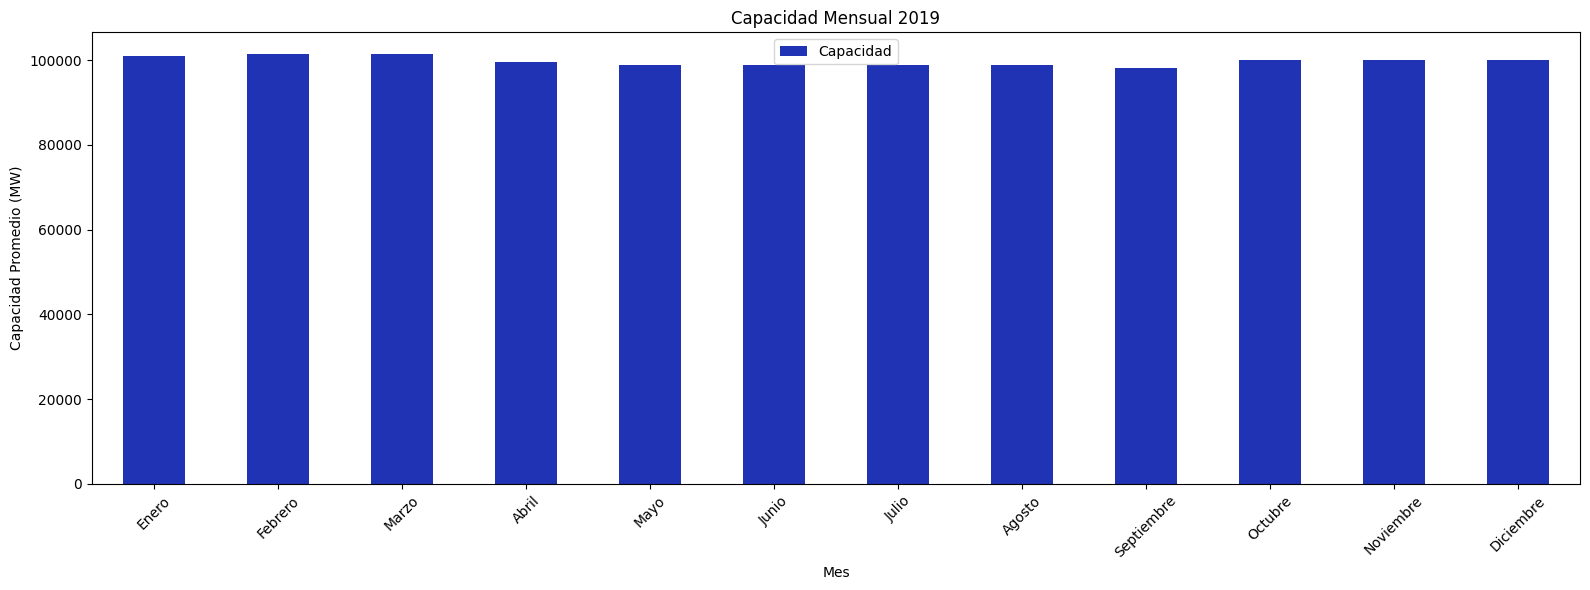

In [23]:
# Calculo el promedio mensual de la capacidad en Megawatts para el año 2019

# Filtro solo los datos del año 2019
df_2019 = df[df.index.year == 2019]

# Calcular promedio mensual de capacidad en 2007
titulo = "Capacidad Mensual 2019"
promedio_mensual_2019 = df_2019.resample('ME').mean()

# Grafico
promedio_mensual_2019.plot.bar(figsize=(16,6), title=titulo, color='#1f33b4')

meses = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 
         'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']
plt.xticks(range(len(promedio_mensual_2007)), meses[:len(promedio_mensual_2019)], rotation=45)

plt.xlabel('Mes')
plt.ylabel('Capacidad Promedio (MW)')
plt.tight_layout()
plt.show()

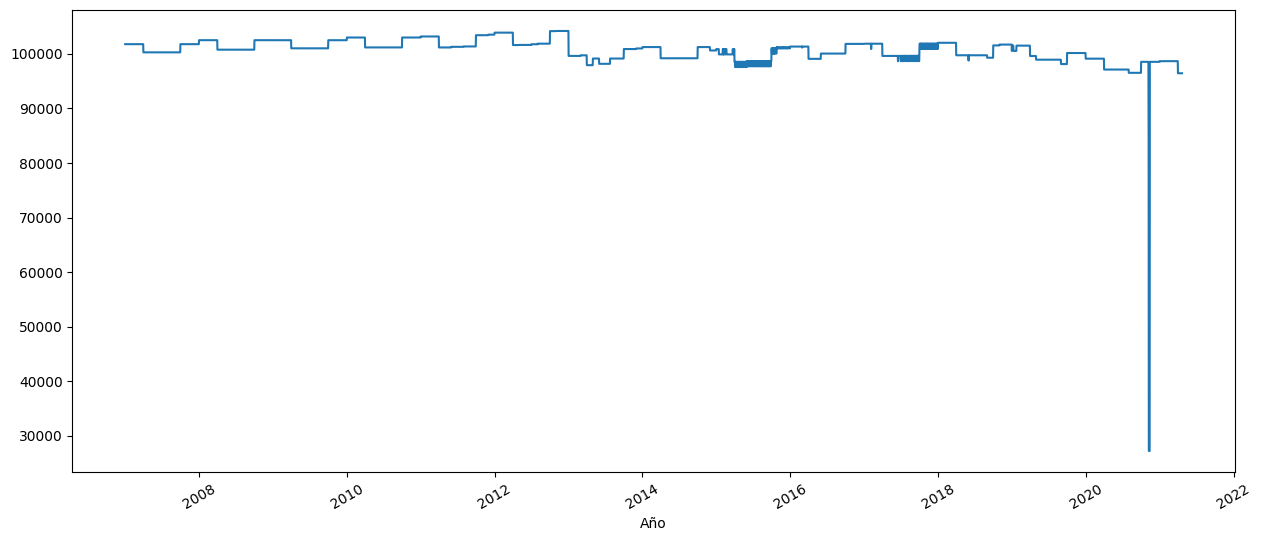

In [24]:
plt.figure(figsize=(15,6))
plt.plot(df)
plt.xlabel("Año")
plt.xticks(rotation=30)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

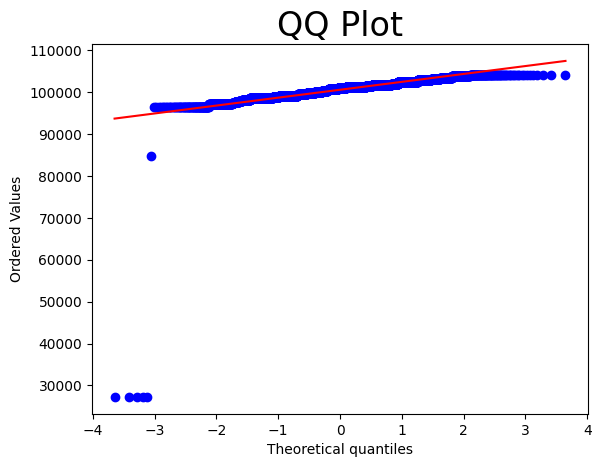

In [25]:
import scipy.stats
import pylab

# Grafico el qqplot
scipy.stats.probplot(df['Capacidad'], plot=pylab)
plt.title("QQ Plot", size = 24)
plt.show

### Prueba de estacionariedad

#### Prueba de Dickey-Fuller aumentada (ADF)

In [26]:
def check_stationarity(series, name=""):
    result = sts.adfuller(series.dropna())
    print(f'Prueba ADF para {name}:')
    print(f'Estadístico: {result[0]:.4f}')
    print(f'p-valor: {result[1]:.4f}')
    print(f'Valores críticos:')
    for key, value in result[4].items():
        print(f'   {key}: {value:.4f}')
    
    # Interpretar resultado
    if result[1] <= 0.05:
        print(f"Conclusión: La serie {name} es estacionaria (p-valor <= 0.05)")
    else:
        print(f"Conclusión: La serie {name} no es estacionaria (p-valor > 0.05)")
    print("-" * 50)
    return result[1] <= 0.05

In [27]:
# Función para graficar series
def plot_series(original, transformed, title="Comparación de Series"):
    plt.figure(figsize=(12, 6))
    plt.subplot(211)
    plt.plot(original)
    plt.title("Serie Original")
    plt.subplot(212)
    plt.plot(transformed, color='red')
    plt.title(title)
    plt.tight_layout()
    plt.show()

In [28]:
# Verificar la serie original
print("ANÁLISIS DE LA SERIE ORIGINAL")
is_stationary = check_stationarity(df['Capacidad'], "original")


ANÁLISIS DE LA SERIE ORIGINAL
Prueba ADF para original:
Estadístico: -5.6329
p-valor: 0.0000
Valores críticos:
   1%: -3.4316
   5%: -2.8621
   10%: -2.5671
Conclusión: La serie original es estacionaria (p-valor <= 0.05)
--------------------------------------------------


## Gráfico PACG

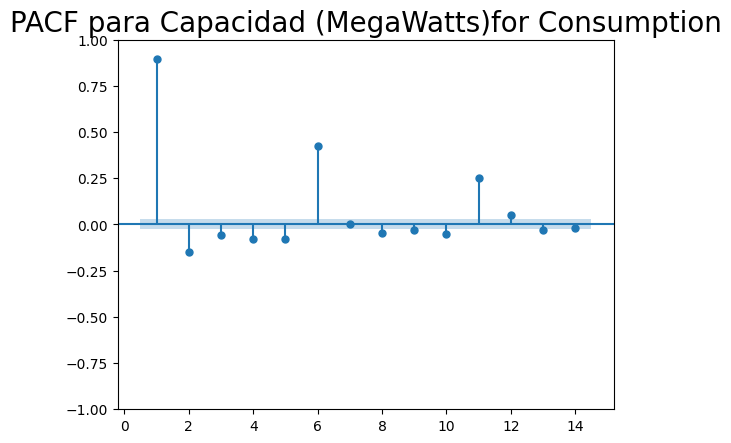

In [29]:
# Grafico de PACF
sgt.plot_pacf(df, zero = False, lags = 14)
plt.title("PACF para Capacidad (MegaWatts)for Consumption", size = 20)
plt.show()

### Análisis del PACF

El gráfico muestra:
1. Un pico significativo en el lag1 (cerano a 0.9).
2. Picos significativos pero menores en los lags 6 y 11.
3. Los demas lags estan dentro de la banda de significancia (cercanos a cero).

#### Consideraciones

1. Modelado ARIMA.
    - Ya que la serie es estacionaria, no requiere diferenciaión, se podría considerar un modelo ARMA(p,q) o simplemente AR(p).
    - El grafico PACF sugiere un modelo AR(1) como punto de partida debido al pico significativo en el primer lag.
    - Se poria intentar un AR(11) para capturar los picos en los lags 6 y 11, pero no sería parsimonioso.

2. Modelos candidatos.
    - Se deberián probar y comparar los siguientes modelos:
        * AR(1): Para comparar la estructura básica.
        * AR(6): Para incluir el segundo pico significativo.
        * AR(11): Para incluir todos los picos significativos.
        * ARMA(1,1): Como alternativa para capturar posibles efectos de media móvil

## Gráfico ACF

Para calcular el termino q de ARMA(p,q)

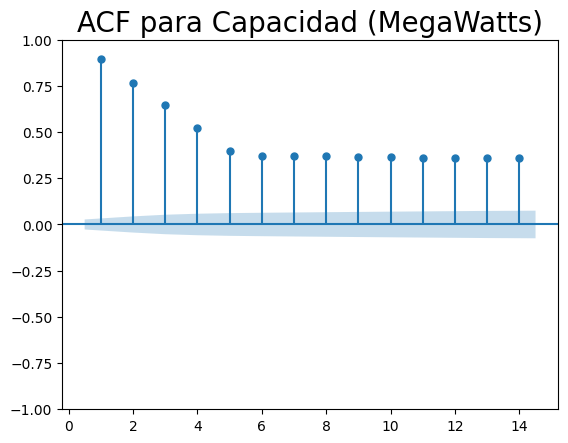

In [30]:

# Grafico de ACF
sgt.plot_acf(df, zero = False, lags = 14)
plt.title("ACF para Capacidad (MegaWatts)", size = 20)
plt.show()

#### Análisis gráfico ACF

- El decaimiento exponencial es caracateristico de procesos autorregresivos, no de media mǘil

O sea si se consideraría una modelo ARMA(p,q) el q sería 0 o muy pequeño q=1.

### Conclusión

El uso de un modelo AR(p) puroi sería más que un ARMA(p,q) o si se insiste en un componente MA, se limitaría q a 1 (ARMA(p,1))

## Modelado

### Modelo AR(1)

In [31]:
# probemos el modelo ARIMA(1)
capacidad_modelo_ar_1 = ARIMA(df, order=(1, 0, 0))
capacidad_modelo_ar_1_resultados = capacidad_modelo_ar_1.fit()
print(capacidad_modelo_ar_1_resultados.summary())

                               SARIMAX Results                                
Dep. Variable:              Capacidad   No. Observations:                 5225
Model:                 ARIMA(1, 0, 0)   Log Likelihood              -44747.532
Date:                Sun, 20 Apr 2025   AIC                          89501.064
Time:                        17:25:06   BIC                          89520.747
Sample:                    01-01-2007   HQIC                         89507.947
                         - 04-21-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.006e+05    586.038    171.680      0.000    9.95e+04    1.02e+05
ar.L1          0.8937      0.001    621.722      0.000       0.891       0.897
sigma2      1.608e+06   2394.637    671.310      0.0

/home/jorge/miniconda3/envs/ast-env/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/jorge/miniconda3/envs/ast-env/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/jorge/miniconda3/envs/ast-env/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


### Modelo AR(2)

In [32]:
# probemos el modelo ARIMA(2)
capacidad_modelo_ar_2 = ARIMA(df, order=(2, 0, 0))
capacidad_modelo_ar_2_resultados = capacidad_modelo_ar_2.fit()
print(capacidad_modelo_ar_2_resultados.summary())

/home/jorge/miniconda3/envs/ast-env/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/jorge/miniconda3/envs/ast-env/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/jorge/miniconda3/envs/ast-env/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:              Capacidad   No. Observations:                 5225
Model:                 ARIMA(2, 0, 0)   Log Likelihood              -44688.550
Date:                Sun, 20 Apr 2025   AIC                          89385.100
Time:                        17:25:06   BIC                          89411.345
Sample:                    01-01-2007   HQIC                         89394.278
                         - 04-21-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.006e+05    467.332    215.288      0.000    9.97e+04    1.02e+05
ar.L1          1.0273      0.002    541.653      0.000       1.024       1.031
ar.L2         -0.1494      0.002    -76.469      0.0

### Modelo AR(3)

In [33]:
# probemos el modelo ARIMA(3)
capacidad_modelo_ar_3 = ARIMA(df, order=(3, 0, 0))
capacidad_modelo_ar_3_resultados = capacidad_modelo_ar_3.fit()
print(capacidad_modelo_ar_3_resultados.summary())

/home/jorge/miniconda3/envs/ast-env/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/jorge/miniconda3/envs/ast-env/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/jorge/miniconda3/envs/ast-env/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:              Capacidad   No. Observations:                 5225
Model:                 ARIMA(3, 0, 0)   Log Likelihood              -44679.985
Date:                Sun, 20 Apr 2025   AIC                          89369.971
Time:                        17:25:07   BIC                          89402.777
Sample:                    01-01-2007   HQIC                         89381.443
                         - 04-21-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.006e+05    444.971    226.107      0.000    9.97e+04    1.01e+05
ar.L1          1.0188      0.002    537.145      0.000       1.015       1.022
ar.L2         -0.0907      0.004    -24.137      0.0

### Modelo AR(4)

In [34]:
# probemos el modelo ARIMA(4)
capacidad_modelo_ar_4 = ARIMA(df, order=(4, 0, 0))
capacidad_modelo_ar_4_resultados = capacidad_modelo_ar_4.fit()
print(capacidad_modelo_ar_4_resultados.summary())

/home/jorge/miniconda3/envs/ast-env/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/jorge/miniconda3/envs/ast-env/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/jorge/miniconda3/envs/ast-env/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:              Capacidad   No. Observations:                 5225
Model:                 ARIMA(4, 0, 0)   Log Likelihood              -44664.897
Date:                Sun, 20 Apr 2025   AIC                          89341.793
Time:                        17:25:07   BIC                          89381.160
Sample:                    01-01-2007   HQIC                         89355.560
                         - 04-21-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.006e+05    417.473    241.000      0.000    9.98e+04    1.01e+05
ar.L1          1.0144      0.002    555.737      0.000       1.011       1.018
ar.L2         -0.0976      0.004    -25.533      0.0

### Modelo AR(5)

In [35]:
# probemos el modelo ARIMA(5)
capacidad_modelo_ar_5 = ARIMA(df, order=(5, 0, 0))
capacidad_modelo_ar_5_resultados = capacidad_modelo_ar_5.fit()
print(capacidad_modelo_ar_5_resultados.summary())

/home/jorge/miniconda3/envs/ast-env/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/jorge/miniconda3/envs/ast-env/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/jorge/miniconda3/envs/ast-env/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:              Capacidad   No. Observations:                 5225
Model:                 ARIMA(5, 0, 0)   Log Likelihood              -44647.892
Date:                Sun, 20 Apr 2025   AIC                          89309.783
Time:                        17:25:07   BIC                          89355.712
Sample:                    01-01-2007   HQIC                         89325.845
                         - 04-21-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.006e+05    396.599    253.684      0.000    9.98e+04    1.01e+05
ar.L1          1.0083      0.002    572.572      0.000       1.005       1.012
ar.L2         -0.0959      0.004    -27.261      0.0

### Modelo AR(6)

In [36]:
# probemos el modelo ARIMA(1)
capacidad_modelo_ar_6 = ARIMA(df, order=(6, 0, 0))
capacidad_modelo_ar_6_resultados = capacidad_modelo_ar_6.fit()
print(capacidad_modelo_ar_6_resultados.summary())

/home/jorge/miniconda3/envs/ast-env/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/jorge/miniconda3/envs/ast-env/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/jorge/miniconda3/envs/ast-env/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:              Capacidad   No. Observations:                 5225
Model:                 ARIMA(6, 0, 0)   Log Likelihood              -44126.159
Date:                Sun, 20 Apr 2025   AIC                          88268.318
Time:                        17:25:07   BIC                          88320.808
Sample:                    01-01-2007   HQIC                         88286.674
                         - 04-21-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.006e+05    650.378    154.696      0.000    9.93e+04    1.02e+05
ar.L1          1.0425      0.002    514.893      0.000       1.039       1.047
ar.L2         -0.0983      0.005    -20.568      0.0

### Modelo AR(11)

In [37]:
# probemos el modelo ARIMA(11)
capacidad_modelo_ar_11 = ARIMA(df, order=(11, 0, 0))
capacidad_modelo_ar_11_resultados = capacidad_modelo_ar_11.fit()
print(capacidad_modelo_ar_11_resultados.summary())

/home/jorge/miniconda3/envs/ast-env/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/jorge/miniconda3/envs/ast-env/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/jorge/miniconda3/envs/ast-env/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:              Capacidad   No. Observations:                 5225
Model:                ARIMA(11, 0, 0)   Log Likelihood              -43934.948
Date:                Sun, 20 Apr 2025   AIC                          87895.896
Time:                        17:25:08   BIC                          87981.192
Sample:                    01-01-2007   HQIC                         87925.725
                         - 04-21-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.006e+05    725.400    138.697      0.000    9.92e+04    1.02e+05
ar.L1          1.0535      0.005    215.838      0.000       1.044       1.063
ar.L2         -0.0852      0.010     -8.492      0.0

### Resultados

### Tabla comparativa de métricas clave.

<html>
<table style="width:100%; border-collapse: collapse; text-align: center;">
  <thead>
    <tr style="background-color:rgb(100, 104, 195);">
      <th style="border: 1px solid #ddd; padding: 8px;">Modelo</th>
      <th style="border: 1px solid #ddd; padding: 8px;">Log Likelihood</th>
      <th style="border: 1px solid #ddd; padding: 8px;">AIC</th>
      <th style="border: 1px solid #ddd; padding: 8px;">BIC</th>
      <th style="border: 1px solid #ddd; padding: 8px;">HQIC</th>
      <th style="border: 1px solid #ddd; padding: 8px;">Ljung-Box (Q)</th>
      <th style="border: 1px solid #ddd; padding: 8px;">Prob(Q)</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td style="border: 1px solid #ddd; padding: 8px;">AR(1)</td>
      <td style="border: 1px solid #ddd; padding: 8px;">-44747.532</td>
      <td style="border: 1px solid #ddd; padding: 8px;">89501.064</td>
      <td style="border: 1px solid #ddd; padding: 8px;">89520.747</td>
      <td style="border: 1px solid #ddd; padding: 8px;">89507.947</td>
      <td style="border: 1px solid #ddd; padding: 8px;">93.40</td>
      <td style="border: 1px solid #ddd; padding: 8px; color: red;">0.00</td>
    </tr>
    <tr>
      <td style="border: 1px solid #ddd; padding: 8px;">AR(2)</td>
      <td style="border: 1px solid #ddd; padding: 8px;">-44688.550</td>
      <td style="border: 1px solid #ddd; padding: 8px;">89385.100</td>
      <td style="border: 1px solid #ddd; padding: 8px;">89411.345</td>
      <td style="border: 1px solid #ddd; padding: 8px;">89394.278</td>
      <td style="border: 1px solid #ddd; padding: 8px;">0.37</td>
      <td style="border: 1px solid #ddd; padding: 8px; color: green;">0.54</td>
    </tr>
    <tr>
      <td style="border: 1px solid #ddd; padding: 8px;">AR(3)</td>
      <td style="border: 1px solid #ddd; padding: 8px;">-44679.985</td>
      <td style="border: 1px solid #ddd; padding: 8px;">89369.971</td>
      <td style="border: 1px solid #ddd; padding: 8px;">89402.777</td>
      <td style="border: 1px solid #ddd; padding: 8px;">89381.443</td>
      <td style="border: 1px solid #ddd; padding: 8px;">0.10</td>
      <td style="border: 1px solid #ddd; padding: 8px; color: green;">0.76</td>
    </tr>
    <tr>
      <td style="border: 1px solid #ddd; padding: 8px; background-color: #3f8db1;">AR(4)</td>
      <td style="border: 1px solid #ddd; padding: 8px; background-color: #3f8db1;">-44664.897</td>
      <td style="border: 1px solid #ddd; padding: 8px; background-color: #3f8db1;">89341.793</td>
      <td style="border: 1px solid #ddd; padding: 8px; background-color: #3f8db1;">89381.160</td>
      <td style="border: 1px solid #ddd; padding: 8px; background-color: #3f8db1;">89355.560</td>
      <td style="border: 1px solid #ddd; padding: 8px; background-color: #3f8db1;">0.19</td>
      <td style="border: 1px solid #ddd; padding: 8px; background-color: #3f8db1; color: green;">0.66</td>
    </tr>
    <tr>
      <td style="border: 1px solid #ddd; padding: 8px;">AR(5)</td>
      <td style="border: 1px solid #ddd; padding: 8px;">-44647.892</td>
      <td style="border: 1px solid #ddd; padding: 8px;">89309.783</td>
      <td style="border: 1px solid #ddd; padding: 8px;">89355.712</td>
      <td style="border: 1px solid #ddd; padding: 8px;">89325.845</td>
      <td style="border: 1px solid #ddd; padding: 8px;">6.16</td>
      <td style="border: 1px solid #ddd; padding: 8px; color: red;">0.01</td>
    </tr>
    <tr>
      <td style="border: 1px solid #ddd; padding: 8px; background-color: #3f8db1;">AR(6)</td>
      <td style="border: 1px solid #ddd; padding: 8px; background-color: #3f8db1;">-44126.159</td>
      <td style="border: 1px solid #ddd; padding: 8px; background-color: #3f8db1;">88268.318</td>
      <td style="border: 1px solid #ddd; padding: 8px; background-color: #3f8db1;">88320.808</td>
      <td style="border: 1px solid #ddd; padding: 8px; background-color: #3f8db1;">88286.674</td>
      <td style="border: 1px solid #ddd; padding: 8px; background-color: #3f8db1;">0.00</td>
      <td style="border: 1px solid #ddd; padding: 8px; background-color: #3f8db1; color: green;">0.99</td>
    </tr>
    <tr>
      <td style="border: 1px solid #ddd; padding: 8px;">AR(11)</td>
      <td style="border: 1px solid #ddd; padding: 8px;">-43934.948</td>
      <td style="border: 1px solid #ddd; padding: 8px;">87895.896</td>
      <td style="border: 1px solid #ddd; padding: 8px;">87981.192</td>
      <td style="border: 1px solid #ddd; padding: 8px;">87925.725</td>
      <td style="border: 1px solid #ddd; padding: 8px;">0.90</td>
      <td style="border: 1px solid #ddd; padding: 8px; color: green;">0.34</td>
    </tr>
  </tbody>
</table>
</html>


### Conclusión

#### Resumen de selección de modelos AR(4) y AR(6)

Los dos modelos ARIMA marcados en la tabla comparativa representan opciones óptimas pero con diferentes fortalezas:

#### Modelo AR(4)
- **Significancia estadística completa**: Todos sus coeficientes son estadísticamente significativos (p<0.05)
- **Parsimonia**: Utiliza menos parámetros, reduciendo el riesgo de sobreajuste
- **Diagnóstico adecuado**: Presenta buenos resultados en la prueba Ljung-Box (Q=0.19, p=0.66), indicando que los residuales no tienen autocorrelación significativa
- **Ideal para contextos académicos**: Donde la significancia de todos los parámetros es habitualmente exigida

#### Modelo AR(6)
- **Ajuste superior**: Muestra una mejora dramática en todos los criterios de información (AIC, BIC, HQIC)
- **Diagnóstico excepcional**: Con un p-valor de 0.99 en la prueba Ljung-Box, es prácticamente perfecto en la eliminación de autocorrelación residual
- **Un coeficiente no significativo**: El parámetro ar.L3 (p=0.317) no es estadísticamente significativo
- **Ideal para predicciones prácticas**: Donde el rendimiento predictivo podría superar consideraciones de significancia estadística

### Selección
Nuestra elección final radica en utilizar un modelo lo mas simple y completo. El AR(4) satisface criterios estadísticos estrictos.